In [ ]:
import pandas as pd
df = pd.read_csv("/Users/sai/flight-delay-analysis/data/Airline_Delay_Cause.csv")
print("Before Cleaning")
print(df.info())
print(df.head())
df_dup = df.drop_duplicates()
df_na = df.dropna()
print("After Cleaning")
print(df_na.info())
print(df_na.head())


Before Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24451 entries, 0 to 24450
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 24451 non-null  int64  
 1   month                24451 non-null  int64  
 2   carrier              24451 non-null  object 
 3   carrier_name         24451 non-null  object 
 4   airport              24451 non-null  object 
 5   airport_name         24451 non-null  object 
 6   arr_flights          24430 non-null  float64
 7   arr_del15            24425 non-null  float64
 8   carrier_ct           24430 non-null  float64
 9   weather_ct           24430 non-null  float64
 10  nas_ct               24430 non-null  float64
 11  security_ct          24430 non-null  float64
 12  late_aircraft_ct     24430 non-null  float64
 13  arr_cancelled        24430 non-null  float64
 14  arr_diverted         24430 non-null  float64
 15  arr_delay           

                               carrier_name   arr_delay
0               Air Wisconsin Airlines Corp   1202673.0
1                   Alaska Airlines Network   2760712.0
2                             Allegiant Air   2180637.0
3                 American Airlines Network  21923277.0
4             CommuteAir LLC dba CommuteAir    988453.0
5                   Delta Air Lines Network  12270282.0
6                         Endeavor Air Inc.   2442471.0
7                                 Envoy Air   3704464.0
8                         Frontier Airlines   4828006.0
9   GoJet Airlines LLC d/b/a United Express    758262.0
10                Hawaiian Airlines Network    586665.0
11                              Horizon Air    689092.0
12                          JetBlue Airways   5050888.0
13                       Mesa Airlines Inc.   1716083.0
14                        PSA Airlines Inc.   3899357.0
15                        Piedmont Airlines   1299455.0
16                         Republic Airline   27

/var/folders/gf/c4jcvd_j20g20_d5tq6pk58r0000gn/T/ipykernel_73695/3192319663.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_airline_delay, x="carrier_name", y="arr_delay", palette="magma")


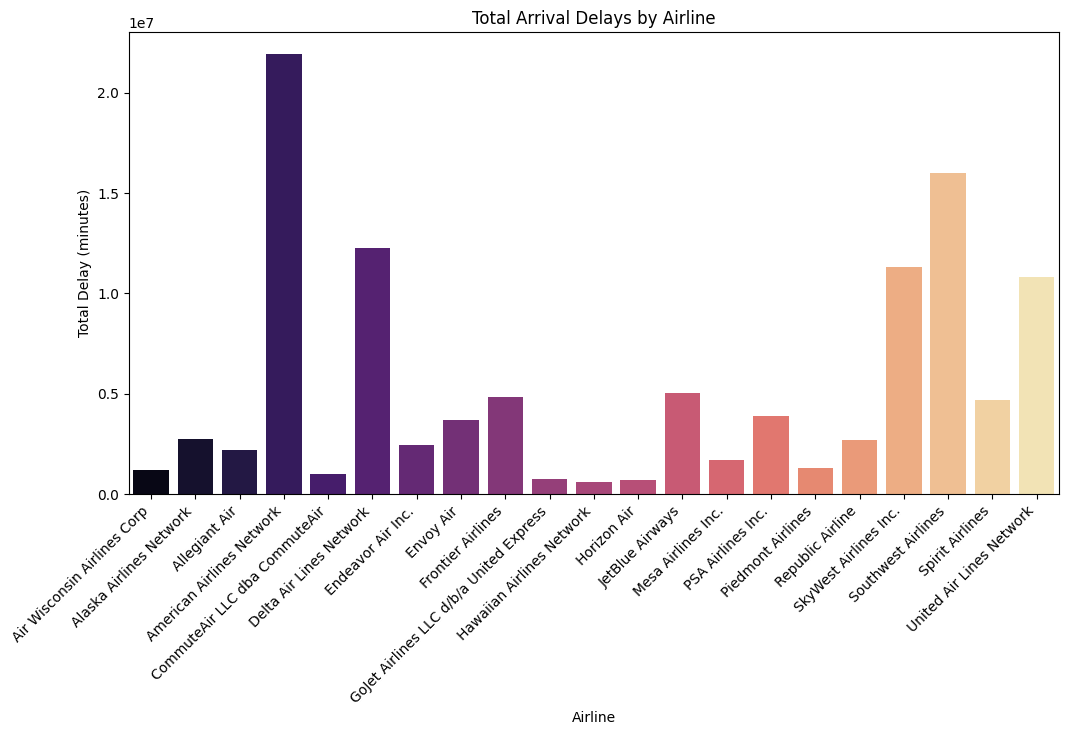

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/sai/flight-delay-analysis/data/Airline_Delay_Cause.csv")
df_airline_delay = df.groupby("carrier_name")["arr_delay"].sum().reset_index()
print(df_airline_delay)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_airline_delay, x="carrier_name", y="arr_delay", palette="magma")
plt.xticks(rotation=45, ha="right")
plt.title("Total Arrival Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Total Delay (minutes)")
plt.show()


In [2]:
print("Test for flight delay")

Test for flight delay
